## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Task (2) Dataset.csv")
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [100]:
df['JamsDelay'] = df['JamsDelay'].astype('int')
df.head()


,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62,6.5,5,58.958314,56.059246


In [101]:
df.City.unique()

array(['Abudhabi', 'Al-ain', 'Cairo', 'Dammam', 'Doha', 'Dubai', 'Jeddah',
       'Kuwait', 'Mecca', 'Medina', 'Riyadh'], dtype=object)

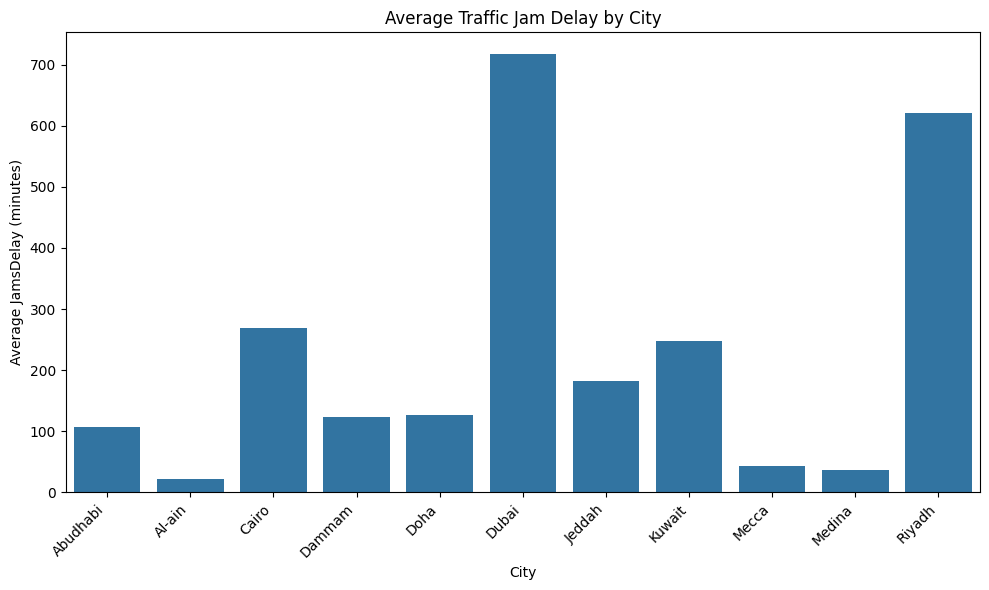

In [102]:
city_jamsdelay = df.groupby('City')['JamsDelay'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_jamsdelay.index, y=city_jamsdelay.values)
plt.xlabel('City')
plt.ylabel('Average JamsDelay (minutes)')
plt.title('Average Traffic Jam Delay by City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


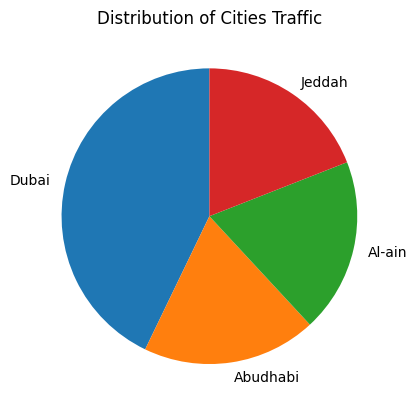

In [103]:
df.City.unique()
RoadTypes = df[(df['City']=='Abudhabi') | (df['City']=='Al-ain') | (df['City']=='Jeddah') | (df['City']=='Dubai')]['City'].value_counts()
plt.pie(RoadTypes, labels=RoadTypes.index,startangle=90)
plt.title('Distribution of Cities Traffic')
plt.show()

In [104]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 66639 non-null  object        
 1   Datetime             66639 non-null  datetime64[ns]
 2   TrafficIndexLive     66639 non-null  int64         
 3   JamsCount            66639 non-null  int64         
 4   JamsDelay            66639 non-null  int64         
 5   JamsLength           66639 non-null  float64       
 6   TrafficIndexWeekAgo  66639 non-null  int64         
 7   TravelTimeHistoric   62772 non-null  float64       
 8   TravelTimeLive       62772 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 4.6+ MB


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [105]:
df.describe()

,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,2023-07-21 19:21:11.079652864,14.043113,74.278531,287.915125,49.316135,13.981737,70.706601,70.048451
min,2022-12-16 11:01:30,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,2023-05-04 19:01:15,3.000000,9.000000,27.000000,3.000000,3.000000,63.142591,60.712805
50%,2023-08-11 02:16:30,10.000000,29.000000,95.000000,12.200000,10.000000,68.894790,68.247303
75%,2023-10-13 05:01:30,21.000000,95.000000,336.000000,53.500000,21.000000,76.250975,77.043739
max,2023-12-15 08:46:30,138.000000,1359.000000,9989.000000,1173.900000,138.000000,120.140593,134.484139
std,NaN,13.488906,107.452022,470.006003,85.352525,13.454922,10.588384,11.966725


In [106]:
df.shape

(66639, 9)

In [107]:
theint_variables = df[['TrafficIndexLive','TrafficIndexWeekAgo','JamsLength']]
Correlation_matrix = theint_variables.corr()
print(Correlation_matrix)

                     TrafficIndexLive  TrafficIndexWeekAgo  JamsLength
TrafficIndexLive             1.000000             0.903282    0.866799
TrafficIndexWeekAgo          0.903282             1.000000    0.787548
JamsLength                   0.866799             0.787548    1.000000


In [108]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 66639 non-null  object        
 1   Datetime             66639 non-null  datetime64[ns]
 2   TrafficIndexLive     66639 non-null  int64         
 3   JamsCount            66639 non-null  int64         
 4   JamsDelay            66639 non-null  int64         
 5   JamsLength           66639 non-null  float64       
 6   TrafficIndexWeekAgo  66639 non-null  int64         
 7   TravelTimeHistoric   62772 non-null  float64       
 8   TravelTimeLive       62772 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 4.6+ MB


City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64

In [109]:
df.drop(index=df[df.TravelTimeHistoric.isnull()].index,inplace=True)


In [110]:
df.isna().sum()

City                   0
Datetime               0
TrafficIndexLive       0
JamsCount              0
JamsDelay              0
JamsLength             0
TrafficIndexWeekAgo    0
TravelTimeHistoric     0
TravelTimeLive         0
dtype: int64

### Identify and analyze patterns in the data.

<Axes: >

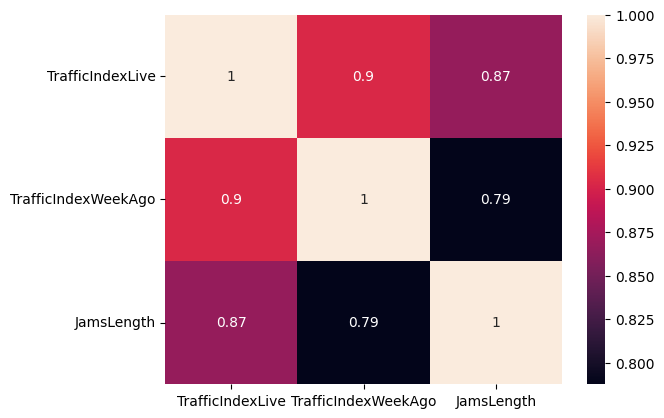

In [111]:
sns.heatmap(Correlation_matrix, annot=True)

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62772 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 62772 non-null  object        
 1   Datetime             62772 non-null  datetime64[ns]
 2   TrafficIndexLive     62772 non-null  int64         
 3   JamsCount            62772 non-null  int64         
 4   JamsDelay            62772 non-null  int64         
 5   JamsLength           62772 non-null  float64       
 6   TrafficIndexWeekAgo  62772 non-null  int64         
 7   TravelTimeHistoric   62772 non-null  float64       
 8   TravelTimeLive       62772 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 4.8+ MB


In [113]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62,6.5,5,58.958314,56.059246


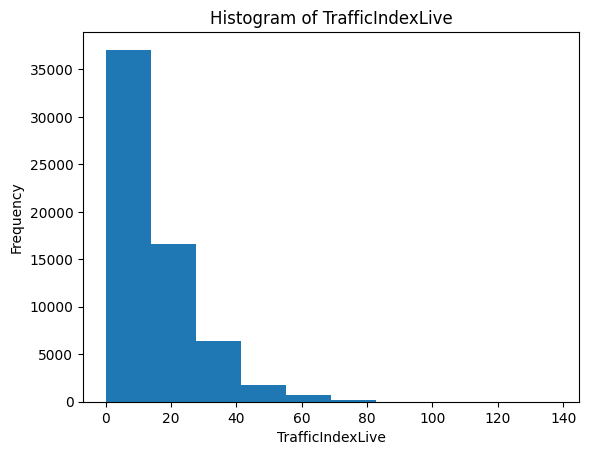

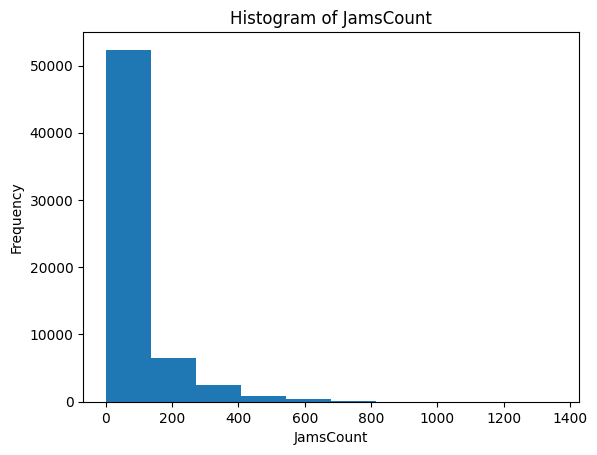

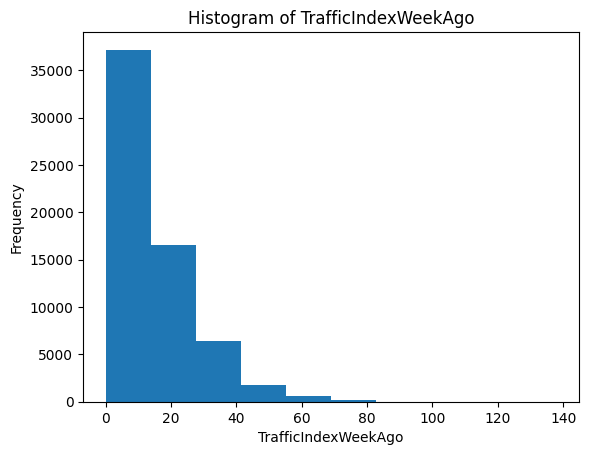

In [114]:
numerical_cols = ['TrafficIndexLive', 'JamsCount','TrafficIndexWeekAgo']
for col in numerical_cols:
  plt.figure()
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {col}')
  plt.show()


### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


In [115]:
numeric_variables = df[['TrafficIndexLive', 'TrafficIndexWeekAgo']]
Correlation_matrix = numeric_variables.corr()
print(Correlation_matrix)

                     TrafficIndexLive  TrafficIndexWeekAgo
TrafficIndexLive             1.000000             0.906485
TrafficIndexWeekAgo          0.906485             1.000000


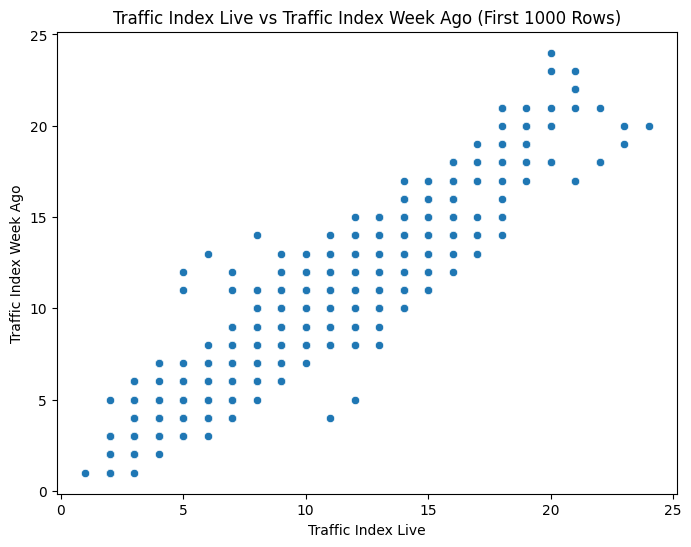

In [116]:
df_subset = df.iloc[:1000]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TrafficIndexLive', y='TrafficIndexWeekAgo', data=df_subset)
plt.title('Traffic Index Live vs Traffic Index Week Ago (First 1000 Rows)')
plt.xlabel('Traffic Index Live')
plt.ylabel('Traffic Index Week Ago')
plt.show()

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

<Axes: ylabel='Frequency'>

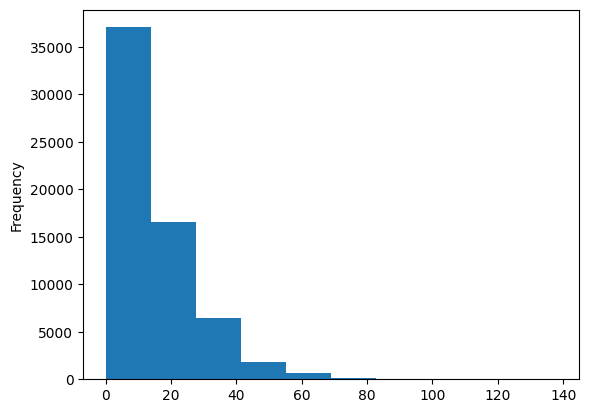

In [117]:
df['TrafficIndexLive'].plot.hist()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>



In [118]:
# # Most Accidents Are 2 cars with each other

# We Can Expect The number of cars each according to the information from last week index
# correlation between the index of last week and live weeks and high and very close which means number of cars each week can be predicted
#Most Jams in the cities are between 3 cities in Dubai and Riyadh and Cairo
#Recommendations

#We Can expect the cars in case there was an event to predict the cummlative number of cars to avoid over traffic
# Expectations of jams in the top three citie are high so we can monitor the tourists between different cities